In [ ]:
#Task 1
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#step 1
df= pd.read_csv("/content/titanic.csv")

df.info()

df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#Step 3
df.duplicated().sum()


0

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


df.drop(columns=['Cabin'], inplace=True)


df.isnull().sum()




<ipython-input-436-0df53ec72740>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-436-0df53ec72740>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


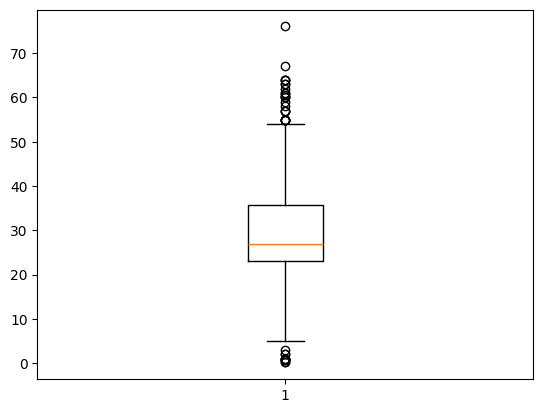

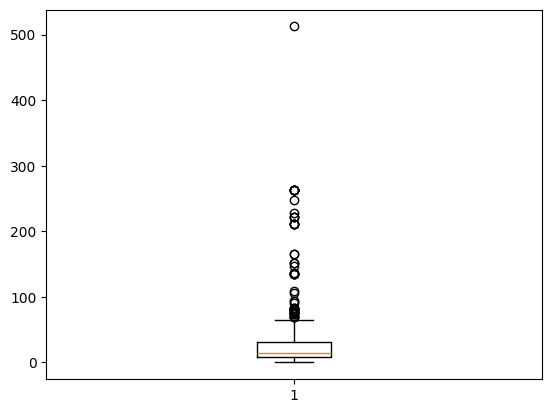

In [ ]:
plt.boxplot(df['Age'])
plt.show()

plt.boxplot(df['Fare'])
plt.show()

In [ ]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) | (df[column] <= upper_bound)]

for col in ['Fare', 'Age']:
    df = remove_outliers(df, col)


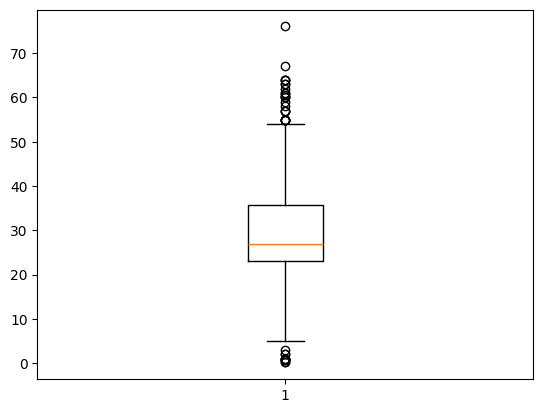

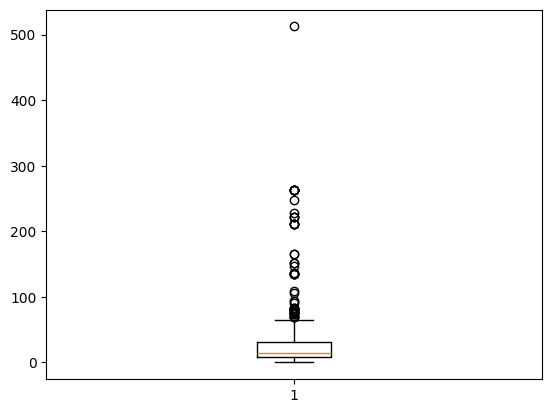

In [ ]:
plt.boxplot(df['Age'])
plt.show()

plt.boxplot(df['Fare'])
plt.show()

<ipython-input-445-d1cf0e14cbe3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pclass'], palette="viridis")


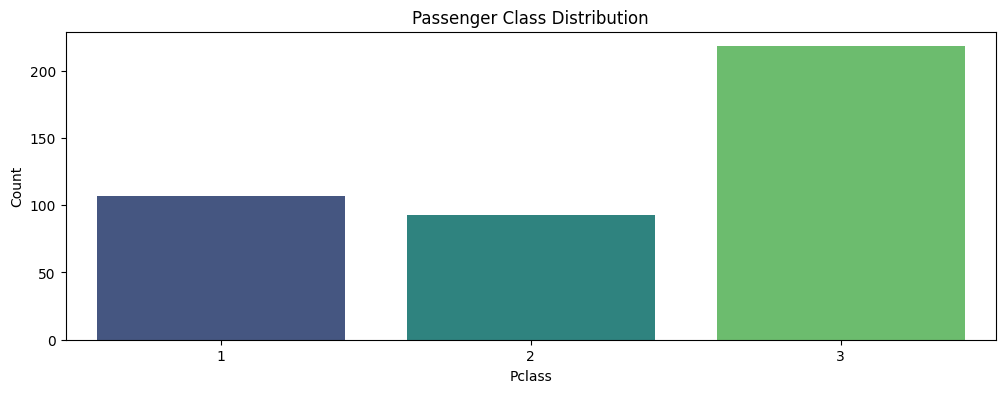

<ipython-input-445-d1cf0e14cbe3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sex'], palette="cool")


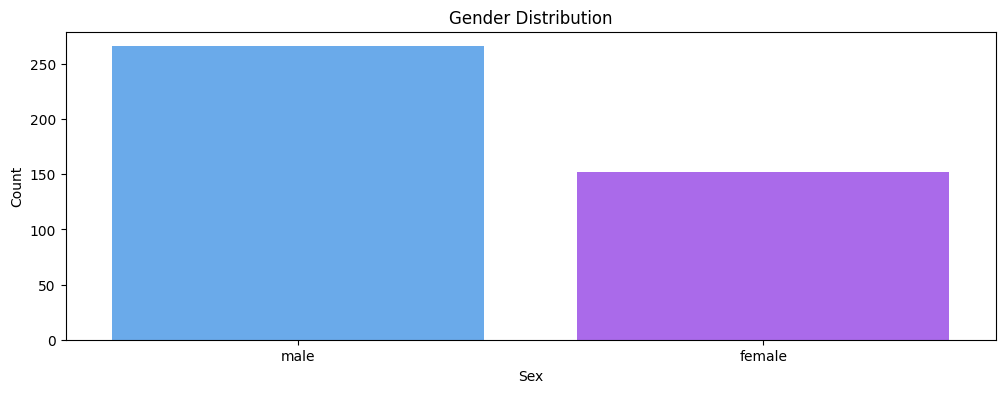

<ipython-input-445-d1cf0e14cbe3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Embarked'], palette="muted")


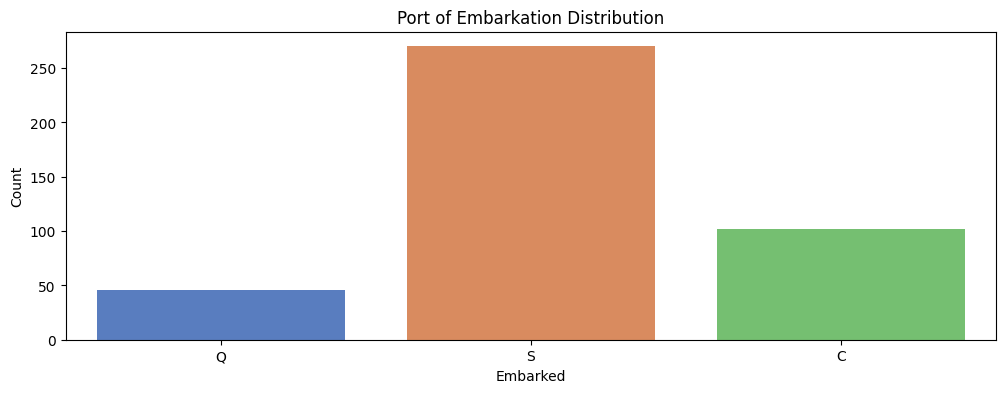

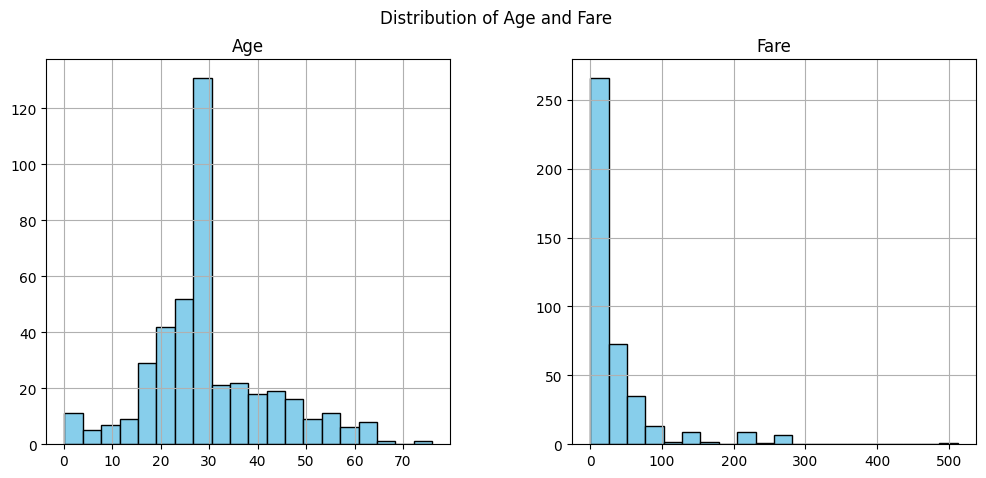

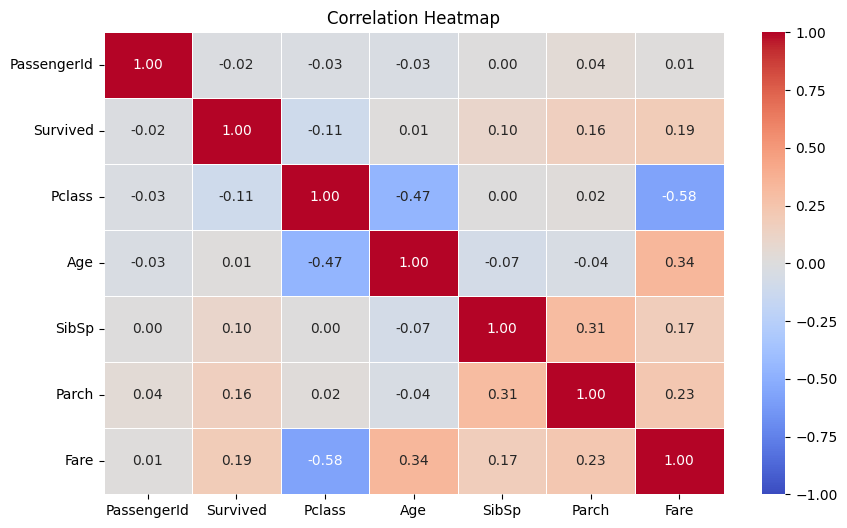

In [ ]:
#Step 3
import matplotlib.pyplot as plt
import seaborn as sns


# Bar chart
plt.figure(figsize=(12, 4))
sns.countplot(x=df['Pclass'], palette="viridis")
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(x=df['Sex'], palette="cool")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(x=df['Embarked'], palette="muted")
plt.title("Port of Embarkation Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

# Histograms
df[['Age', 'Fare']].hist(figsize=(12, 5), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Age and Fare")
plt.show()

plt.figure(figsize=(10, 6))

#Corelation heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()



In [2]:
#Step 4
"""The dataset contains missing values in Age, Fare, and Cabin.
The Cabin column had too many missing values, so it was dropped.
Age and Fare had missing values, which were imputed with their median.
Box plots showed the presence of outliers in Age and Fare.
Outliers were managed using the IQR method, ensuring extreme values do not heavily influence the analysis.
The majority of passengers belonged to Pclass 3 (as seen in the bar chart).
There were more males than females on board.
Most passengers embarked from Southampton (S).
The correlation heatmap showed that Fare and Pclass have a strong negative correlation (higher class numbers paid lower fares).
Survival rate was likely influenced by Pclass, Sex, and Fare."""

'The dataset contains missing values in Age, Fare, and Cabin.\nThe Cabin column had too many missing values, so it was dropped.\nAge and Fare had missing values, which were imputed with their median.\nBox plots showed the presence of outliers in Age and Fare.\nOutliers were managed using the IQR method, ensuring extreme values do not heavily influence the analysis.\nThe majority of passengers belonged to Pclass 3 (as seen in the bar chart).\nThere were more males than females on board.\nMost passengers embarked from Southampton (S).\nThe correlation heatmap showed that Fare and Pclass have a strong negative correlation (higher class numbers paid lower fares).\nSurvival rate was likely influenced by Pclass, Sex, and Fare.'

In [7]:
#Task 2

# Step 1: Install and Import libraries
!pip install -U nltk

import nltk
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 2: Download NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the missing resource.

# Step 3: Load IMDB dataset
print("\nLoading dataset...")
# Use 'on_bad_lines' instead of 'error_bad_lines' for pandas versions 1.3 and above.
# For older versions, consider using 'skiprows' to handle problematic lines.
try:
    reviews = pd.read_csv("/content/IMDB Dataset.csv", quoting=3, on_bad_lines='skip')
except TypeError:
    reviews = pd.read_csv("/content/IMDB Dataset.csv", quoting=3, skiprows=lambda x: x > 0 and pd.isnull(pd.read_csv("/content/IMDB Dataset.csv", quoting=3, skiprows=range(1, x + 1), nrows=1, header=None).iloc[0, 0]))

print("Dataset loaded successfully!")

# Separate features and labels
X = reviews['review'].values
# Handle NaN values in the 'sentiment' column before mapping
reviews['sentiment'] = reviews['sentiment'].fillna('unknown') # Replace NaN with 'unknown'
y = reviews['sentiment'].map({'positive': 1, 'negative': 0, 'unknown': -1}).values # Map 'unknown' to -1
# Remove rows with 'unknown' sentiment
valid_indices = y != -1
X = X[valid_indices]
y = y[valid_indices]

# Step 4: Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if text is a string, convert to string if not
    if not isinstance(text, str):
        text = str(text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

print("\nPreprocessing Started... (may take few minutes)")
X_preprocessed = [preprocess_text(review) for review in X]  # Apply the updated function to each review
print("Preprocessing Completed!")


# Step 5: Feature Engineering using TF-IDF
print("\nConverting text to TF-IDF vectors...")
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_preprocessed)
print("TF-IDF conversion done!")

# Step 6: Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 7: Train Naive Bayes Model
print("\nTraining Naive Bayes model...")
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model training completed!")

# Step 8: Model Evaluation
print("\nEvaluating model...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall   : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Step 9: Custom Sentiment Prediction
def predict_sentiment(review_text):
    preprocessed = preprocess_text(review_text)
    vector = vectorizer.transform([preprocessed])
    prediction = model.predict(vector)[0]
    sentiment = "Positive 😊" if prediction == 1 else "Negative 😞"
    print(f"\nInput Review: {review_text}")
    print(f"Predicted Sentiment: {sentiment}")

# Example prediction
sample_review = "The movie was absolutely fantastic! Loved the story and acting."
predict_sentiment(sample_review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Loading dataset...
Dataset loaded successfully!

Preprocessing Started... (may take few minutes)
Preprocessing Completed!

Converting text to TF-IDF vectors...
TF-IDF conversion done!

Training Naive Bayes model...
Model training completed!

Evaluating model...

Model Evaluation Metrics:
Accuracy : 0.5556
Precision: 0.5273
Recall   : 0.8286
F1 Score : 0.6444

Detailed Report:
              precision    recall  f1-score   support

    Negative       0.65      0.30      0.41        37
    Positive       0.53      0.83      0.64        35

    accuracy                           0.56        72
   macro avg       0.59      0.56      0.53        72
weighted avg       0.59      0.56      0.52        72


Input Review: The movie was absolutely fantastic! Loved the story and acting.
Predicted Sentiment: Positive 😊


In [8]:
!pip install pandas numpy scikit-learn imbalanced-learn


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('/content/Auto_fraud.csv')
# Step 1: Data Preprocessing
def preprocess_data(df):
    # Handle missing values
    df = df.copy()

    # Fill missing numerical values with median
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Fill missing categorical values with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    # Convert categorical variables to numerical using Label Encoding
    le = LabelEncoder() # Fixed indentation here
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Handle range values (e.g., 'more than 30', '20000 to 29000')
    range_cols = ['VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
                 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
                 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']

    for col in range_cols:
        df[col] = df[col].apply(lambda x: str(x).split(' to ')[0] if ' to ' in str(x) else
                              (str(x).split(' than ')[1] if ' than ' in str(x) else x))
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df


# Step 2: Model Training
def train_model(X, y):
    # Split features and target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle imbalanced data with SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)

    return rf_model, X_test, y_test


# Step 3: Model Evaluation
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics, specifying 'weighted' for multiclass averaging
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Model Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    return y_pred


# Step 4: Testing Interface
def test_interface(model, feature_columns):
    print("\nFraud Detection Testing Interface")
    print("Enter claim details (press Enter to use default value):")

    test_data = {}
    for col in feature_columns:
        if col != 'FraudFound_P':
            default_val = df[col].mode()[0]
            value = input(f"{col} (default: {default_val}): ") or default_val
            test_data[col] = value

    # Create test dataframe
    test_df = pd.DataFrame([test_data])

    # Preprocess test data
    test_df_processed = preprocess_data(test_df)

    # Make prediction
    prediction = model.predict(test_df_processed)
    probability = model.predict_proba(test_df_processed)[0]

    print("\nPrediction Results:")
    print(f"Fraud Prediction: {'Fraudulent' if prediction[0] == 1 else 'Not Fraudulent'}")
    print(f"Confidence Score: {max(probability):.2%}")


# Main execution
if __name__ == "__main__":
    df = pd.read_csv('/content/Auto_fraud.csv')
    # Preprocess the data
    df_processed = preprocess_data(df)
    # Separate features and target
    X = df_processed.drop('FraudFound_P', axis=1)
    y = df_processed['FraudFound_P']

    # Train the model
    model, X_test, y_test = train_model(X, y)

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Launch testing interface
    test_interface(model, df.columns)

Model Evaluation Metrics:
Precision: 0.8959
Recall: 0.9102
F1-Score: 0.9025

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2884
           1       0.22      0.16      0.18       199
          11       0.00      0.00      0.00         1

    accuracy                           0.91      3084
   macro avg       0.39      0.37      0.38      3084
weighted avg       0.90      0.91      0.90      3084


Fraud Detection Testing Interface
Enter claim details (press Enter to use default value):
Month (default: Jan): feburary
WeekOfMonth (default: 3): 2
DayOfWeek (default: Monday): 7
Make (default: Pontiac): 
AccidentArea (default: Urban): 
DayOfWeekClaimed (default: Monday): 
MonthClaimed (default: Jan): 
WeekOfMonthClaimed (default: 2): 
Sex (default: Male): 
MaritalStatus (default: Married): 
Age (default: 30.0): 
Fault (default: Policy Holder): 
PolicyType (default: Sedan - Collision): 
VehicleCategory 

In [10]:
#TASK 4

import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
df=pd.read_csv("/content/BostonHousing.csv")
def load_and_preprocess_data(data_string):

    lines = data_string.strip().split('\n')
    headers = lines[0].split(',')
    data = [line.split(',') for line in lines[1:]]
    df = pd.DataFrame(data, columns=headers)

    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.fillna(df.median(), inplace=True)

    X = df.drop('MEDV', axis=1).values
    y = df['MEDV'].values


    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X = (X - X_mean) / X_std

    return X, y, headers[:-1]




In [11]:
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    indices = np.random.permutation(n)
    test_size = int(n * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]



In [12]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iter = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [26]:
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = {}

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, 0)

    def _grow_tree(self, X, y, depth):
        if depth >= self.max_depth or len(X) < self.min_samples_split:
            return np.mean(y)

        n_features = X.shape[1]
        best_feature, best_threshold, best_loss = self._best_split(X, y)

        if best_loss == float('inf'):
            return np.mean(y)

        left_idx = X[:, best_feature] <= best_threshold
        right_idx = X[:, best_feature] > best_threshold

        left = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
        right = self._grow_tree(X[right_idx], y[right_idx], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left, 'right': right}

    def _best_split(self, X, y):
        best_loss = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idx = X[:, feature] <= threshold
                right_idx = X[:, feature] > threshold

                if sum(left_idx) == 0 or sum(right_idx) == 0:
                    continue

                left_y, right_y = y[left_idx], y[right_idx]
                loss = (len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)) / len(y)

                if loss < best_loss:
                    best_loss = loss
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold, best_loss


    def predict(self, X):
        return np.array([self._predict_row(x, self.tree) for x in X])


    def _predict_row(self, x, tree):
        if not isinstance(tree, dict):
            return tree

        if x[tree['feature']] <= tree['threshold']:
            return self._predict_row(x, tree['left'])
        return self._predict_row(x, tree['right'])


In [27]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_trees):
            idx = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[idx], y[idx]

            tree = DecisionTree(self.max_depth, self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


    def feature_importance(self, X):
        importance = np.zeros(X.shape[1])
        for tree in self.trees:
            if isinstance(tree.tree, dict):
                importance[tree.tree['feature']] += 1
        return importance / self.n_trees

In [28]:

def rmse(y_true, y_pred):
    return sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)


Linear Regression:
RMSE: nan
R²: nan

Random Forest:
RMSE: nan
R²: nan


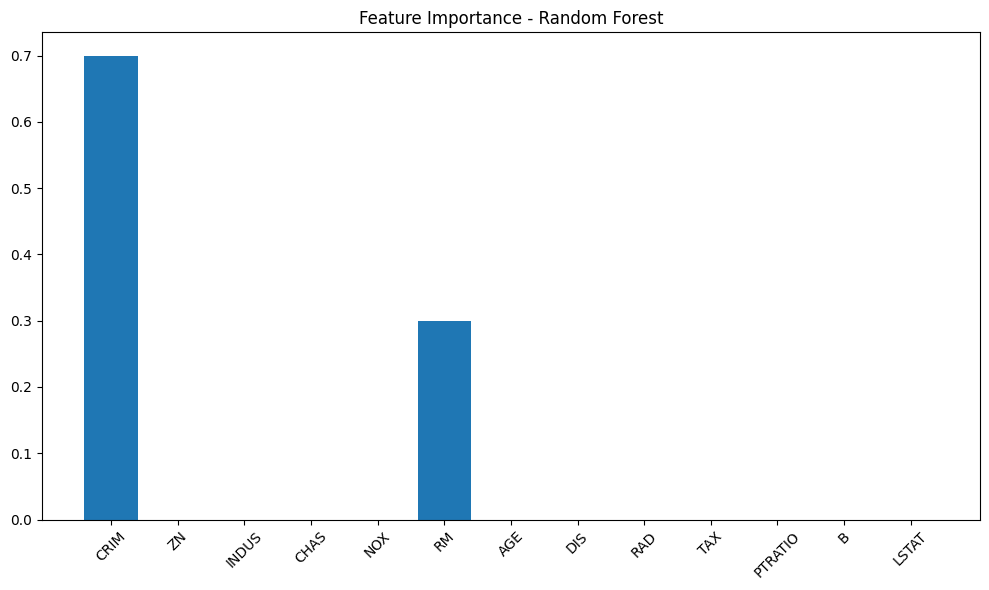

In [29]:

def main():
    data_string = """CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4"""


    X, y, feature_names = load_and_preprocess_data(data_string)
    X_train, X_test, y_train, y_test = train_test_split(X, y)


    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)


    rf = RandomForest(n_trees=10, max_depth=5)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)


    models = {'Linear Regression': lr_pred, 'Random Forest': rf_pred}
    for name, pred in models.items():
        print(f"\n{name}:")
        print(f"RMSE: {rmse(y_test, pred):.4f}")
        print(f"R²: {r2_score(y_test, pred):.4f}")


    importance = rf.feature_importance(X)
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, importance)
    plt.xticks(rotation=45)
    plt.title('Feature Importance - Random Forest')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()